### Decision Tree
- 스무고개 하듯 예/아니오 질문을 반복하여 학습
- 특정 기준(질문)에 따라 데이터를 구분하는 모델
    - 최적 질문의 기준 : <b>불순도(impurity)</b>가 낮아지는 방향(= 순도가 높아지는 방향)
- 분류와 회귀 모두 사용가능
- 어떻게 노드를 분할하는지 <b>시각화<b> 가능
- 단점 : 과적합으로 정확도가 떨어질 수 있음

### 버섯 데이터 실습

## 목표
- 버섯의 특징을 활용해 독/식용 버섯을 분류
- DecisionTree 시각화 & 과대적합 속성 제어

In [1]:
# 1. 데이터를 로딩
# 2. 전체 컬럼, 행 숫자 파악
# 3. 결측치 파악
# 4. 문제와 답 분리
# 5. 기술통계 -> 범주형 데이터 : 갯수, 최빈값, 종류
# 6. label의 비율 확인

In [2]:
import pandas as pd

In [3]:
# mushroom.csv 파일 가져오기
data = pd.read_csv('mushroom.csv')
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


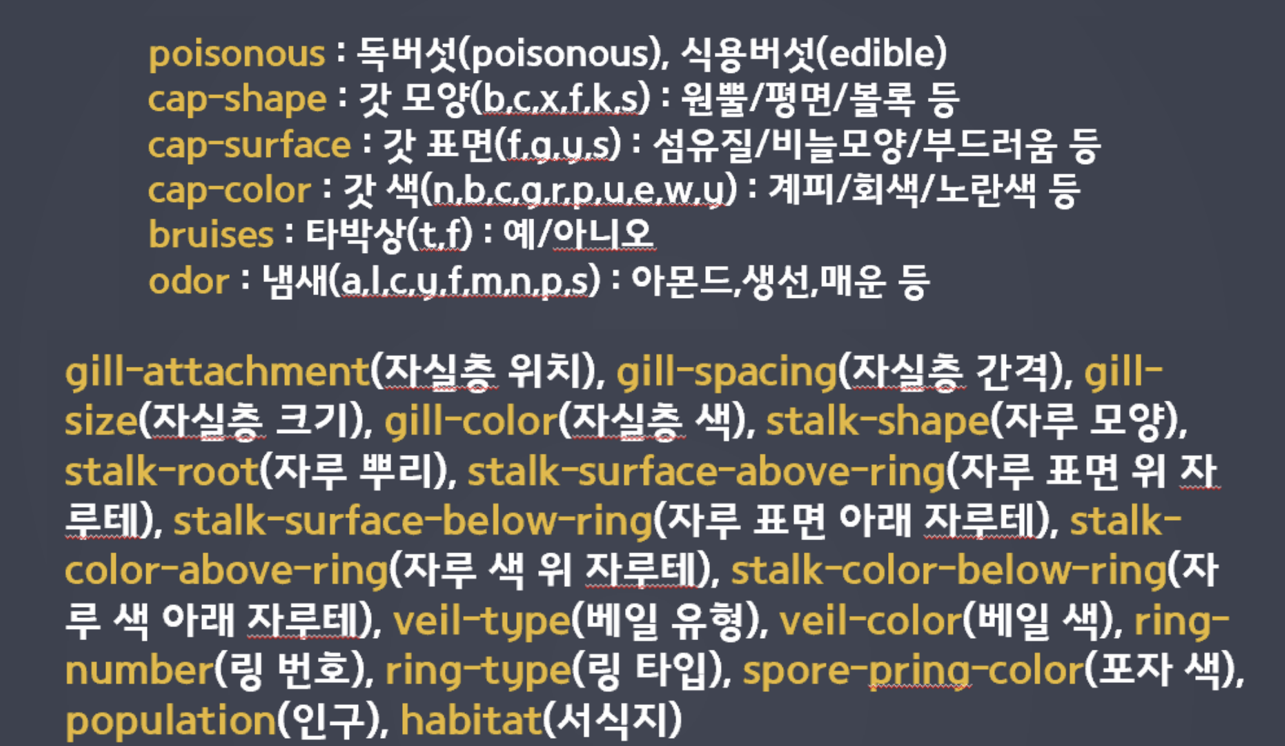

In [4]:
# data의 크기/모양 확인
data.shape

(8124, 23)

In [5]:
# data의 (결측치/행 개수/데이터타입) 확인 (object= 문자타입)
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# 문제와 답 분리
X=data.loc[:,'cap-shape':]
y=data.loc[:,'poisonous']

In [7]:
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [8]:
# y(답)에서 p와 e의 개수 확인
# e(edible) : 식용버섯
# p(poisionous) : 독버섯
print(y) # 함수 : 독자적으로 사용 가능
y.value_counts() # 메서드 : .기능

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object


e    4208
p    3916
Name: poisonous, dtype: int64

In [9]:
# 범주형 데이터 기술 통계 확인
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## 인코딩 
- 원핫인코딩(One-hot encoding)/레이블인코딩(Label encoding)

### 레이블 인코딩
- 단순 수치값으로 mapping하는 작업
- 단점 : 숫자의 크고 작음에 대한 특성으로 인해 예측성능이 떨어지는 경우가 발생

#### 레이블 인코딩 방법1 : dictionary 변환 mappingn (수작업)

In [10]:
# 'habitat' 데이터의 중복을 제거한 값을 출력
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [11]:
X.loc[:,'habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [12]:
# mapping : 데이터를 연결한다
habitat_dict = {
    'u':2,
    'g':1,
    'm':3,
    'd':5,
    'p':4,
    'w':6,
    'l':7
}
habitat_dict

{'u': 2, 'g': 1, 'm': 3, 'd': 5, 'p': 4, 'w': 6, 'l': 7}

In [13]:
X['habitat'].map(habitat_dict)

0       2
1       1
2       3
3       2
4       1
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

#### 레이블 인코딩 방법2 : LableEncoder

In [14]:
from sklearn.preprocessing import LabelEncoder

items = X['habitat'].unique()

# LabelEncoder를 객체로 생성
encoder = LabelEncoder()

# fit() : 레이블 인코더를 학습시킴
encoder.fit(items)

# transform() : 학습된 인코더를 사용하여 데이터를 변환
labels = encoder.transform(items)
print('인코딩 변환값 : ', labels)

인코딩 변환값 :  [5 1 3 0 4 6 2]


In [15]:
# classes_ : 인코딩 클래스 확인 
print('인코딩 클래스 : ',encoder.classes_)

인코딩 클래스 :  ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [16]:
# mapping 확인하고 나중에 다시 답해줄 것임

In [17]:
#책# inverse_transform([])
print('디코딩 원본값 : ',encoder.inverse_transform([5, 1,3, 0, 4, 6, 2])

SyntaxError: incomplete input (608733107.py, line 2)

### 원핫 인코딩
- 특성을 세부적으로 나눠서 생각할 수 있음
- 단어를 표현하는 가장 기본적인 표현 방법
- 0 or 1의 값을 가진 여러 개의 새로운 특성으로 변경하는 작업
- 단점 : 필요한 공간이 계속 늘어나 저장공간 측면에서 비효율적인 방법

In [18]:
# get_dummies() 메서드 활용
X_one_hot = pd.get_dummies(X) # 0과 1로만 이루어진 열을 생성
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [19]:
X['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [20]:
# 원핫인코딩 이전과 원핫인코딩 이후 특성 비교하기
print('원핫인코딩 이전 특성 : \n',list(X.columns),'\n')
print('원핫인코딩 이후 특성 : \n',list(X_one_hot.columns))

원핫인코딩 이전 특성 : 
 ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] 

원핫인코딩 이후 특성 : 
 ['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-co

## 모델링

In [21]:
# train_test_split() 불러오기
from sklearn.model_selection import train_test_split

In [69]:
# 문제(X_one_hot)와 답데이터를 훈련세트와 테스트세트(7:3)으로 나누기
# train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_one_hot,
                                                    y,
                                                    test_size=0.3)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5686, 117)
(2438, 117)
(5686,)
(2438,)


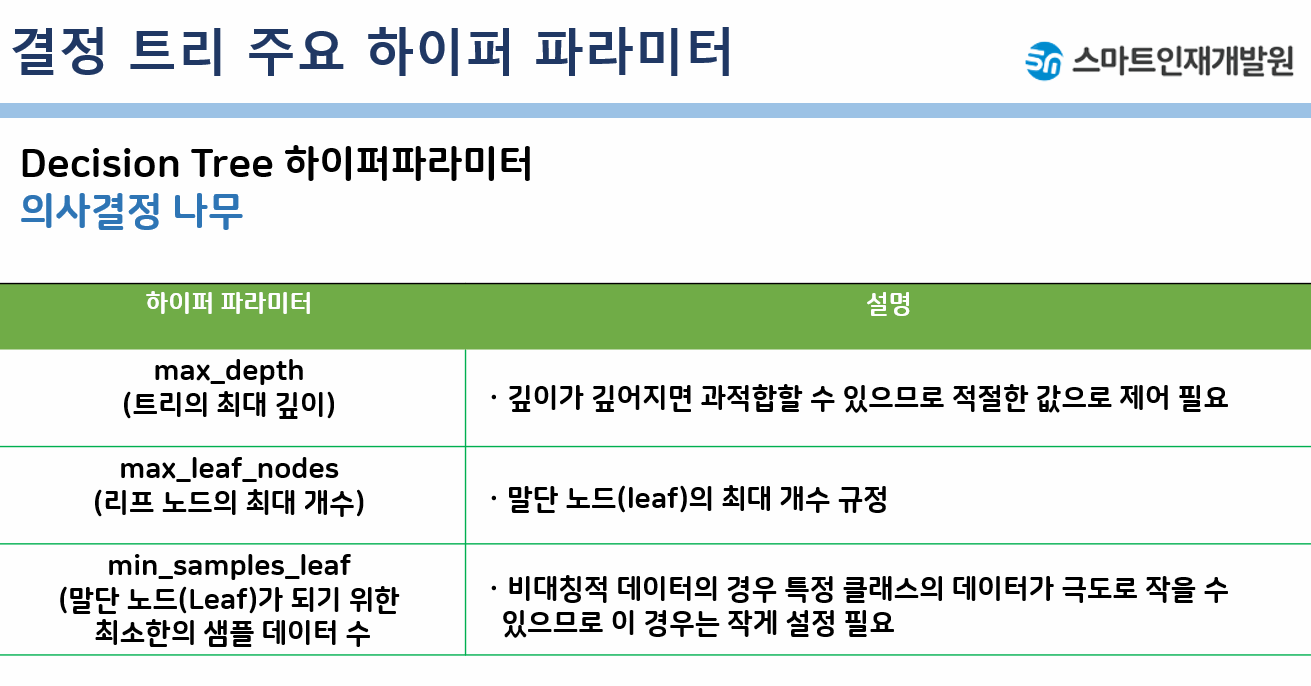

In [71]:
# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier #분류
# 회귀 - DecisionTreeRegressor

In [72]:
# 결정트리 모델 생성 - tree변수에 담기
tree = DecisionTreeClassifier(max_depth = 3) # 과적합으로 알고리즘 성능이 떨어질 수 있기에 트리의 크기를 사전에 제한하는 튜닝이 필요

In [73]:
# 훈련 - fit()
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [74]:
# 예측하기 - pedict()
pre = tree.predict(X_test)

In [75]:
# 정확도 평가 - metrics / accuracy_score 함수 사용
from sklearn import metrics
print('예측정확도 : ',metrics.accuracy_score(pre,y_test))

예측정확도 :  0.9868744872846595


### 결정트리 시각화

In [76]:
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [77]:
plt.rcParams['font.family']='Malgun Gothic';

In [78]:
X_one_hot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

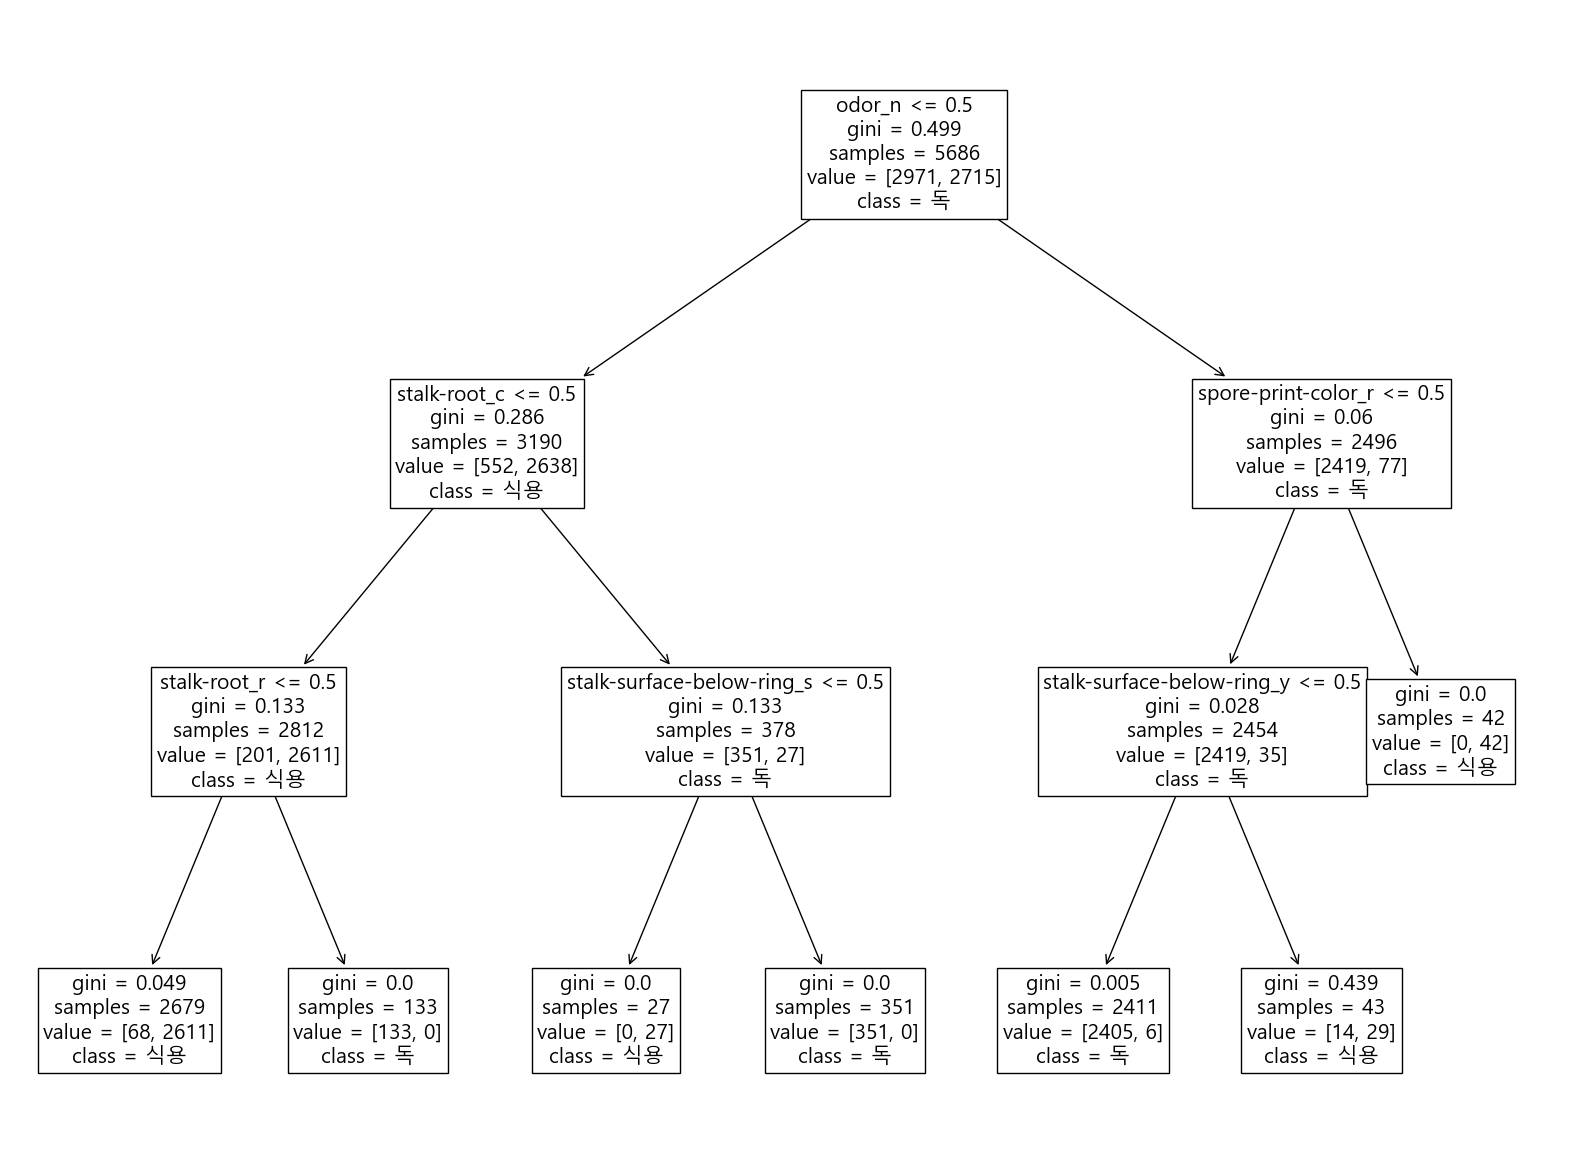

In [79]:
plt.figure(figsize =(20,15))
plot_tree(tree, class_names=['독','식용'], feature_names=list(X_one_hot.columns),fontsize=15)
plt.show()

### 특성선택
- tree 모델의 특성 중요도

In [80]:
fi = tree.feature_importances_
print('특성중요도 : \n',fi)

특성중요도 : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.66384975 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.18309088
 0.         0.09002698 0.         0.         0.         0.
 0.         0.         0.01875316 0.01426706 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.  

In [81]:
# 컬럼이름은 '특성중요도로 설정' (columns =['컬럼명'])
# 내림차순 정렬 진행/ sort_values(by='컬럼명' , ascending=True/False)
importance_df = pd.DataFrame(fi, index=X_one_hot.columns, columns=['특성중요도'])
importance_df.sort_values(by ='특성중요도', ascending=False)

# ordor_n 이라는 특성이 가장 중요한 특성으로 나타남

,특성중요도
odor_n,0.663850
stalk-root_c,0.183091
stalk-root_r,0.090027
spore-print-color_r,0.030012
stalk-surface-below-ring_s,0.018753
...,...
gill-size_b,0.000000
gill-spacing_w,0.000000
gill-spacing_c,0.000000
gill-attachment_f,0.000000


### 하이퍼파라미터 튜닝

In [94]:
test_list=[]
train_list=[]

for n in range(1,105,2):
    # 결정트리 모델 생성
    tree = DecisionTreeClassifier(max_depth = n)
    # 결정트리 모델 훈련
    tree.fit(X_train,y_train)
    # 테스트 성능 예측
    test_pre = tree.predict(X_test)
    # 테스트 성능 평가
    test_score= metrics.accuracy_score(test_pre,y_test)
    # test_list 성능평가 값 추가
    test_list.append(test_score)
    #print("test max_depth: ", n , "-", test_score)
    # 훈련 성능 예측
    train_pre = tree.predict(X_train)
    # 훈련 성능 평가
    train_score = metrics.accuracy_score(train_pre,y_train)
    # train_list 성능평가 값 추가
    train_list.append(train_score)
    #print("train max_depth: ", n , "-", train_score)


In [89]:
test_list

[0.8806398687448729,
 0.9868744872846595,
 0.9958982772764561,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [90]:
train_list

[0.8893774182201899,
 0.9845233907843827,
 0.9970102004924376,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

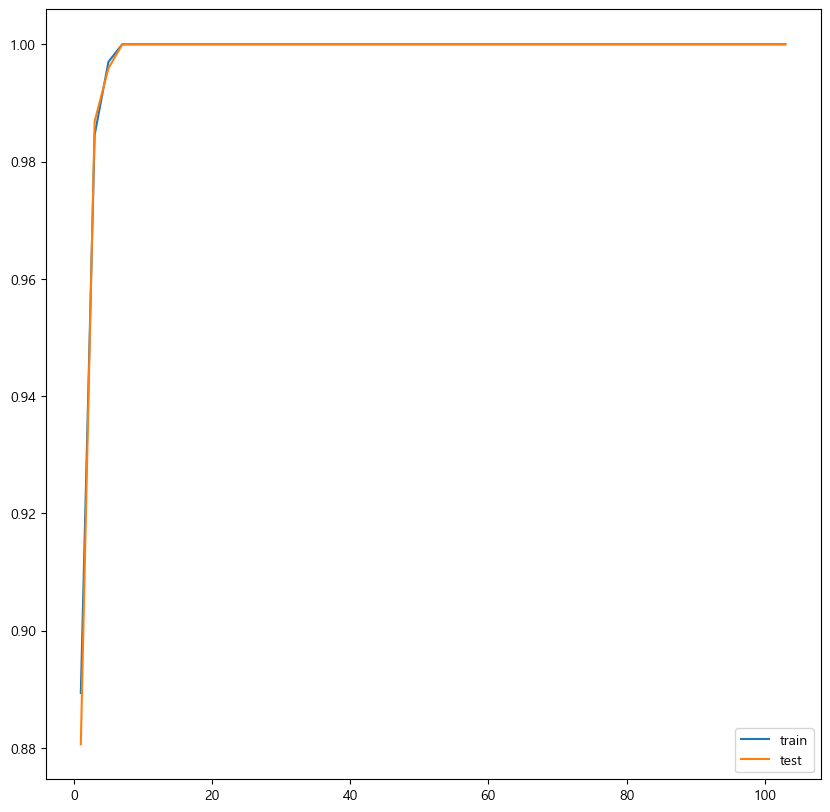

In [92]:
# 훈련용/테스트 성능평가 비교 (시각화)

plt.figure(figsize=(10,10))
# train_list 성능값 그래프 그리기
plt.plot(range(1,105,2),train_list, label="train") # label값 달아주기
# test_list 성능값 그래프 그리기
plt.plot(range(1,105,2),test_list, label="test")
# 범례표시
plt.legend()

plt.show()

- 결정트리 정리
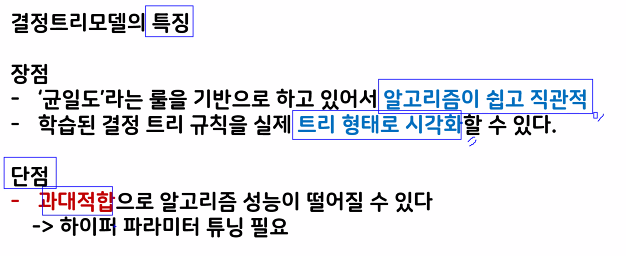

##### 교차 검증
- 데이터의 편중을 막기 위해서 별도의 여러 세트로 구성된 학습데이터세트와 검증데이터세트에서 학습과 평가 수행
- like 모의고사
- <b>K 폴드 교차검증</b> (보편)
    - 데이터세트 5등분 중 1번부터 검증데이터 그 외 학습데이터로 해서 검증평가 5번 수행 (k=5)
    - 5번 검증 평가의 표준편차로 데이터 판단 (표준편차 크면 너무 훈련데이터에 민감 => 과적합)
    - KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영 못할 수 있음 => Stritified K Fold
- <b>Stratified K 폴드</b>
    - 불균형한 분포도를 가진 레이블 데이터(결정 클래스) 집합을 위한 K폴드 방식
    - 학습 데이터와 검증 데이터 세트가 가지는 레이블 분포도가 유사하도록 검증 데이터 추출

### K 폴드 교차 검증

In [115]:
from sklearn.model_selection import KFold
import numpy as np

# 데이터프레임을 넘파이 배열로 변환
feature = X_one_hot.to_numpy()
label = y.to_numpy()

# 5개의 폴드 세트로 분리한는 KFold 객체생성
kfold = KFold(n_splits=5)

In [113]:
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [116]:
# 세트별 정확도를 담을 리스트 생성
cv_accuracy =[]

# KFold 객체의 split()을 호출하면 세트별 학습용, 검증용 행 인덱스를 반환
for train_index, test_index in kfold.split(X_one_hot):
    # Kfold.split()으로 반환된 학습용, 검증용 데이터 추출
    X_train, X_test = feature[train_index], feature[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    tree.fit(X_train,y_train)
    pre = tree.predict(X_test)
    
    # 반복시마다 정확도 측정
    accuracy = metrics.accuracy_score(pre,y_test)
    cv_accuracy.append(accuracy)
    
print(cv_accuracy)

[1.0, 1.0, 1.0, 1.0, 0.9901477832512315]


In [125]:
print('평균 : ',np.array(cv_accuracy).mean())
print('표준편차 : ',np.array(cv_accuracy).std())

평균 :  0.9980295566502463
표준편차 :  0.0039408866995073845


In [118]:
# KFold교차검증을 더 쉽게 하는 API cross_val_score()

from sklearn.model_selection import cross_val_score

result = cross_val_score(tree,
               X_train,
               y_train,
               cv=5)
result

array([1.        , 1.        , 1.        , 0.99769231, 0.92538462])

In [121]:
print('평균 : ',result.mean())
print('표준편차 : ',result.std())

평균 :  0.9846153846153847
표준편차 :  0.029628868059465373
